In [30]:
import pandas as pd
import random as rnd
import matplotlib.pyplot as plt
import seaborn as sns
import time

NUMERO_DE_FILMES=25

PALETTE_AZUL="Blues_r"
PALETTE_CUBEHELIX="cubehelix"
PALETTE_VERDE_AZUL="GnBu_r"
PALETTE_AZUL_VERDE="BuGn_r"
PALETTE_GELO_FOGO="icefire"

#arquivos IMDB
notas_filename = "title.ratings.tsv"    
filmes_filename = "title.akas.tsv"  

start_nb = time.process_time()

In [19]:
start = time.process_time()

# carrega todo o arquivo de notas (avaliações)
notas_df = pd.read_csv(
         notas_filename,
         header=0, 
         sep='\t'
)
notas_df.columns = ["filmeId", "notaMedia", "totalVotos"]

print("Tempo gasto: %s segundos" % (time.process_time() - start))

notas_df 

Tempo gasto: 0.3521662730000017 segundos


,filmeId,notaMedia,totalVotos
0,tt0000001,5.6,1609
1,tt0000002,6.0,197
2,tt0000003,6.5,1287
3,tt0000004,6.1,121
4,tt0000005,6.1,2052
...,...,...,...
1031803,tt9916576,6.0,9
1031804,tt9916578,8.4,17
1031805,tt9916720,5.6,49
1031806,tt9916766,6.8,13


In [20]:
notas_df["totalVotos"].describe()

count    1.031808e+06
mean     9.621957e+02
std      1.586632e+04
min      5.000000e+00
25%      9.000000e+00
50%      2.000000e+01
75%      7.800000e+01
max      2.226412e+06
Name: totalVotos, dtype: float64

In [21]:
start = time.process_time()
  
types = {'titleId':str,'title':str,'region':str,'language':str,'types':str,'attributes':str,'isOriginalTitle':str}

# carrega todo o arquivo de filmes (avaliações)
filmes_df = pd.read_csv(
         filmes_filename,
         dtype=types,
         header=0, 
         sep='\t'
)

filmes_orig_df = filmes_df.query("isOriginalTitle=='1' & types=='original'")
filmes_reduzido_df = filmes_orig_df.query("isOriginalTitle=='1'").drop(columns=['ordering', 'isOriginalTitle','types','attributes'])
filmes_reduzido_df.columns = ["filmeId", "titulo", "regiao","idioma"]

print("Tempo gasto: %s segundos" % (time.process_time() - start))

filmes_reduzido_df

Tempo gasto: 16.329120340999992 segundos


,filmeId,titulo,regiao,idioma
6,tt0000001,Carmencita,\N,\N
8,tt0000002,Le clown et ses chiens,\N,\N
20,tt0000003,Pauvre Pierrot,\N,\N
24,tt0000004,Un bon bock,\N,\N
41,tt0000005,Blacksmith Scene,\N,\N
...,...,...,...,...
21384915,tt9916216,Kalyanam Mudhal Kadhal Varai,\N,\N
21384942,tt9916270,Il talento del calabrone,\N,\N
21385170,tt9916460,Pink Taxi,\N,\N
21385452,tt9916678,Acelerados,\N,\N


In [22]:
start = time.process_time()

filmes_completo = filmes_reduzido_df.set_index('filmeId').join(notas_df.set_index('filmeId'))
filmes_completo

print("Tempo gasto: %s segundos" % (time.process_time() - start))

Tempo gasto: 2.6144039810000095 segundos


0          5.6
1          6.0
2          6.5
3          6.1
4          6.1
          ... 
1031803    6.0
1031804    8.4
1031805    5.6
1031806    6.8
1031807    7.2
Name: notaMedia, Length: 1031808, dtype: float64
Tempo gasto: 0.18911500999999475 segundos


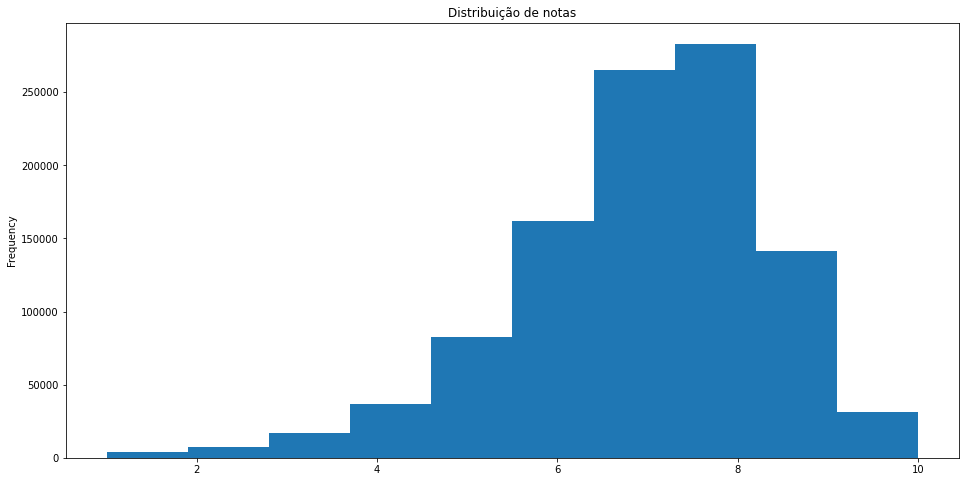

In [23]:
start = time.process_time()

notas_inteiras = notas_df.notaMedia 
print(notas_inteiras)
plt.figure(figsize=(16,8))
plt.title("Distribuição de notas")
notas_inteiras.plot(kind="hist")

print("Tempo gasto: %s segundos" % (time.process_time() - start))

In [24]:
#
# função para plotar barras
#
def plot_barrar(titulo,total_de_barras,dataframe,palette,eixo_x,eixo_y):
  # estilo   
  sns.set_style("whitegrid")
  # tamanho do grafico
  plt.figure(figsize=(16,8))
  # titulo
  plt.title(titulo)
  plt.grid(True)
  # descreve os nomes do eixo y  
  plt.xticks(rotation=45, horizontalalignment='right')
  # desenha o gráfico  
  sns.barplot(x=eixo_x,
              y=eixo_y,
              palette=sns.color_palette(palette, n_colors=len(dataframe) + 4))
  return dataframe

Tempo gasto: 0.10868002099999785 segundos


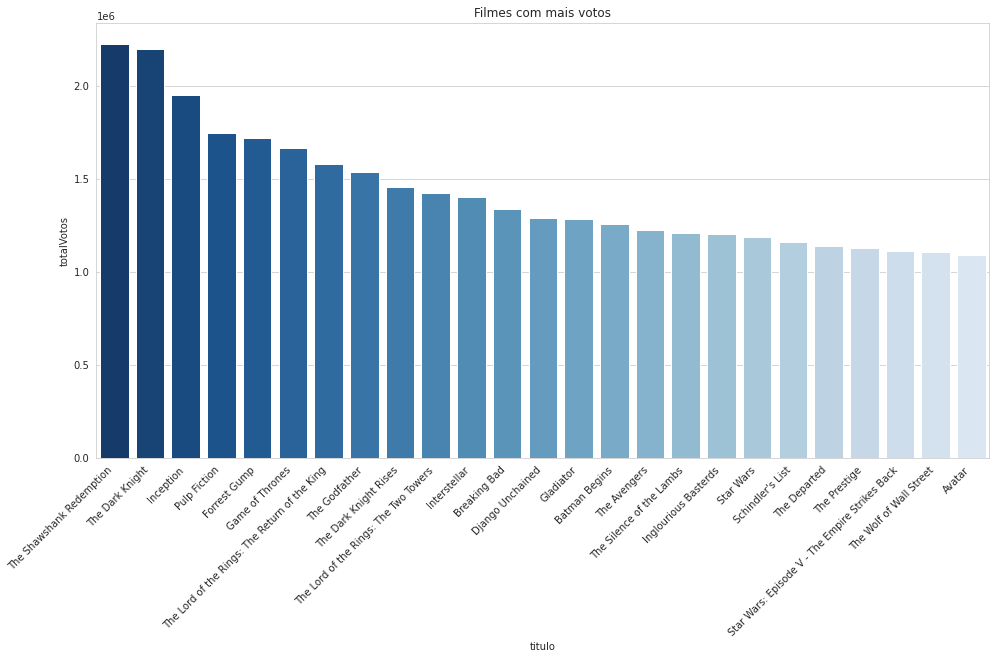

In [25]:
start = time.process_time()

votos_validos_df = filmes_completo[["titulo","totalVotos"]]
top_votos_validos_df = votos_validos_df.nlargest(NUMERO_DE_FILMES,"totalVotos")

plot_barrar("Filmes com mais votos",
            NUMERO_DE_FILMES,
            top_votos_validos_df,
            PALETTE_AZUL,
            top_votos_validos_df.titulo.astype(str),
            top_votos_validos_df.totalVotos.astype(int))

print("Tempo gasto: %s segundos" % (time.process_time() - start))

Tempo gasto: 0.10888214899999582 segundos


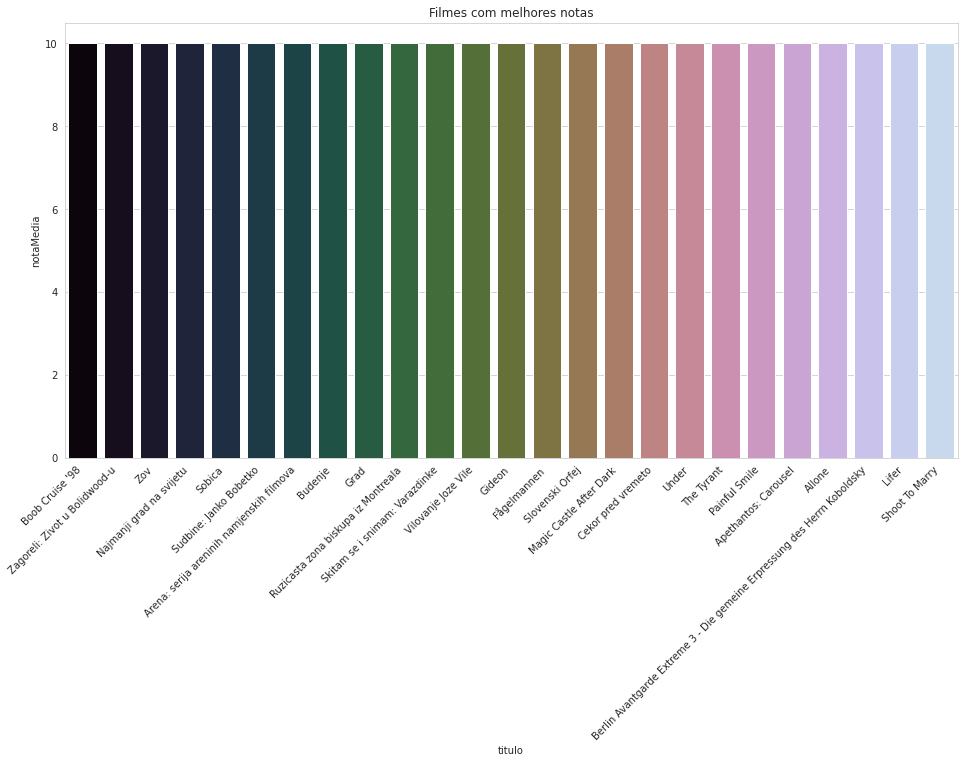

In [26]:
start = time.process_time()

votos_validos_media_df = filmes_completo[["titulo","notaMedia"]]
top_votos_validos_media_df = votos_validos_media_df.nlargest(NUMERO_DE_FILMES,"notaMedia")

plot_barrar("Filmes com melhores notas",
            NUMERO_DE_FILMES,
            top_votos_validos_media_df,
            PALETTE_CUBEHELIX,
            top_votos_validos_media_df.titulo.astype(str),
            top_votos_validos_media_df.notaMedia.astype(int))

print("Tempo gasto: %s segundos" % (time.process_time() - start))

Tempo gasto: 9.154889018000006 segundos


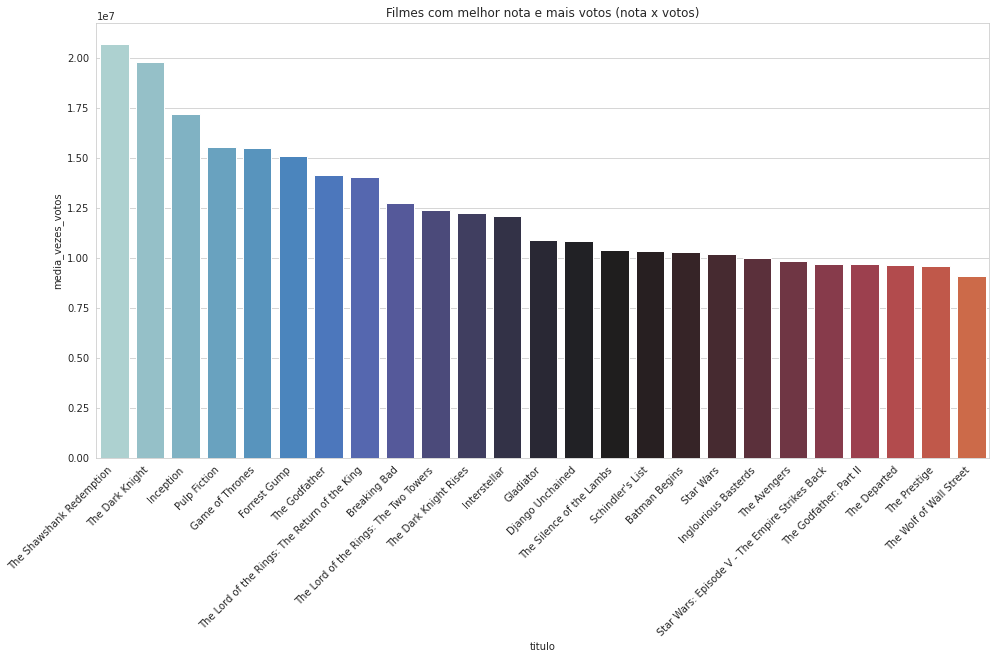

In [27]:
start = time.process_time()

votos_validos_media_df = filmes_completo.loc[:, ('titulo', 'notaMedia', 'totalVotos')] 
votos_validos_media_df['media_vezes_votos'] = votos_validos_media_df.apply(lambda row: row.notaMedia * row.totalVotos, axis = 1) 
top_votos_validos_media_df = votos_validos_media_df.nlargest(NUMERO_DE_FILMES,"media_vezes_votos")

plot_barrar("Filmes com melhor nota e mais votos (nota x votos)",
            NUMERO_DE_FILMES,
            top_votos_validos_media_df,
            PALETTE_GELO_FOGO,
            top_votos_validos_media_df.titulo.astype(str),            
            top_votos_validos_media_df.media_vezes_votos.astype(int))

print("Tempo gasto: %s segundos" % (time.process_time() - start))

Tempo gasto: 13.106527101000012 segundos


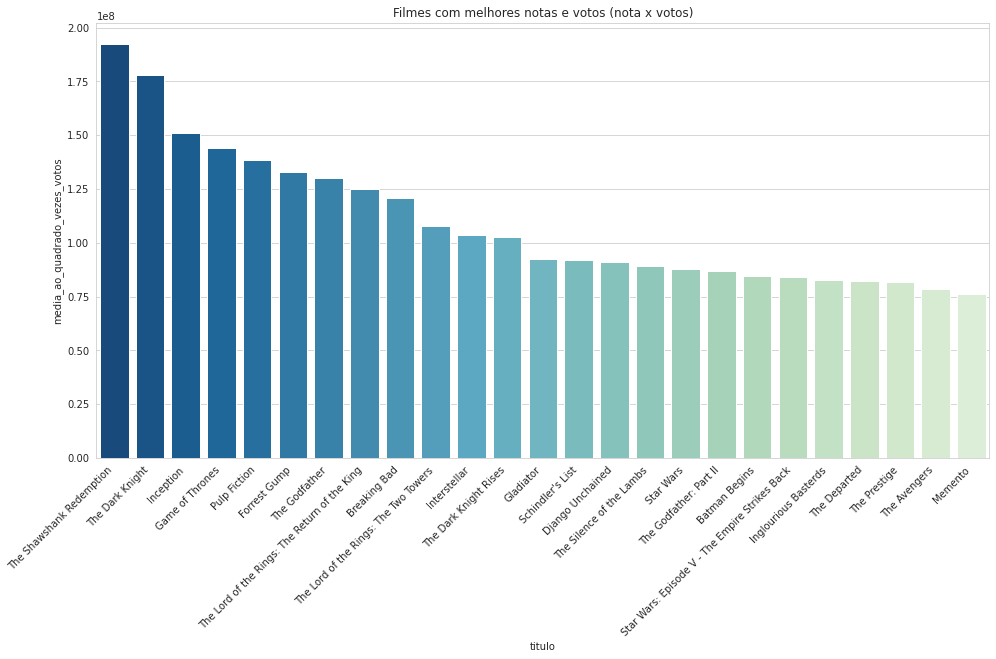

In [28]:
start = time.process_time()

votos_validos_media_qd_df = filmes_completo.loc[:,('titulo', 'notaMedia', 'totalVotos')] 
votos_validos_media_qd_df['media_ao_quadrado_vezes_votos'] = votos_validos_media_df.apply(lambda row: row.notaMedia * row.notaMedia * row.totalVotos, axis = 1) 
top_votos_validos_media_qd_df = votos_validos_media_qd_df.nlargest(NUMERO_DE_FILMES,"media_ao_quadrado_vezes_votos")

plot_barrar("Filmes com melhores notas e votos (nota x votos)",
            NUMERO_DE_FILMES,
            top_votos_validos_media_qd_df,
            PALETTE_VERDE_AZUL,
            top_votos_validos_media_qd_df.titulo.astype(str),
            top_votos_validos_media_qd_df.media_ao_quadrado_vezes_votos.astype(int))

print("Tempo gasto: %s segundos" % (time.process_time() - start))

In [29]:
print("Tempo total gasto: %s segundos" % (time.process_time() - start_nb))

Tempo total gasto: 43.277008757999994 segundos
